# Objective: Identify malicious transactions
- True Positive: Actually bad and is flagged as bad (DESIRED)
- True Negative: Actually good and is not flagged as bad (DESIRED)
- False Negative: Actually bad and not flagged as bad (NOT DESIRED)
- False Positive: Actually good and is flagged as bad (OKAY)

# Two different algorithms
1. Predefined Patterns: Uses a set of established patterns to check new transactions for. Patterns can be added to it over time.
2. Dynamically-Defined Patterns: Uses a training set to train and build a pattern list. Patterns can be added to it over time.

In [2]:
#import necessary functions
from combined import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#create function to draw graphs

def draw_graph(x_axis_values, df, x_label, y_label, title):
    # Plot the lines
    plt.plot(x_axis_values, df['True_Negative'], label='True Negative', color='blue', linestyle="dashed")
    plt.plot(x_axis_values, df['False_Positive'], label='False Positive', color='orange', linestyle="dotted")
    plt.plot(x_axis_values, df['False_Negative'], label='False Negative', color='green', linestyle="solid")
    plt.plot(x_axis_values, df['True_Positive'], label='True Positive', color='black', linestyle="dashdot")

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()


# Varying total number of transactions


In [3]:
#collect and organize data 
num_data_items = 100
min_ops_per_transaction = 5
max_ops_per_transaction = 10
num_training_data = 200000

starting_index = 100
increment_amount = 50
num_groupings = 6

groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=num_data_items, num_transactions=starting_index+i*increment_amount, min_ops_per_transaction=min_ops_per_transaction, max_ops_per_transaction=max_ops_per_transaction, num_training_data=num_training_data))
    x_axis_values.append(starting_index+i*increment_amount)


defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

print("Pre-Defined:")
print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")
print()
print("Dynamically Defined:")
print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

#statistics for defined
defined_accuracies = []
defined_precisions = []
defined_recalls = []
defined_F1s = []

for i in range(num_groupings):
    good_nonflagged = defined_good_nonflagged[i]
    good_flagged = defined_good_flagged[i]
    bad_nonflagged = defined_bad_nonflagged[i]
    bad_flagged = defined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if not (recall==0.0 and precision==0.0) and ((isinstance(recall, float)) and (isinstance(precision, float))):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    defined_accuracies.append(accuracy)
    defined_precisions.append(precision)
    defined_recalls.append(recall)
    defined_F1s.append(F1)

#statistics for defined
predefined_accuracies = []
predefined_precisions = []
predefined_recalls = []
predefined_F1s = []

for i in range(num_groupings):
    good_nonflagged = predefined_good_nonflagged[i]
    good_flagged = predefined_good_flagged[i]
    bad_nonflagged = predefined_bad_nonflagged[i]
    bad_flagged = predefined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if not (recall==0.0 and precision==0.0) and ((isinstance(recall, float)) and (isinstance(precision, float))):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    predefined_accuracies.append(accuracy)
    predefined_precisions.append(precision)
    predefined_recalls.append(recall)
    predefined_F1s.append(F1)


Pre-Defined:
True Negatives: [87, 136, 178, 227, 272, 310]
False Positives: [8, 6, 12, 11, 13, 22]
False Negatives: [0, 0, 0, 0, 0, 0]
True Positives: [5, 8, 10, 12, 15, 18]

Dynamically Defined:
True Negatives: [30, 52, 63, 82, 98, 108]
False Positives: [65, 90, 127, 156, 187, 224]
False Negatives: [1, 5, 2, 5, 10, 4]
True Positives: [4, 3, 8, 7, 5, 14]


Statistics for Predefined
    Accuracies: [0.92, 0.96, 0.94, 0.96, 0.96, 0.94]
    Precisions: [0.38, 0.57, 0.45, 0.52, 0.54, 0.45]
    Recalls: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
    F1's: [0.55, 0.73, 0.62, 0.68, 0.7, 0.62]
Actual values in graph:
    True Negatives: [87, 136, 178, 227, 272, 310]
    False Positives: [8, 6, 12, 11, 13, 22]
    False Negatives: [0, 0, 0, 0, 0, 0]
    True Positives: [5, 8, 10, 12, 15, 18]


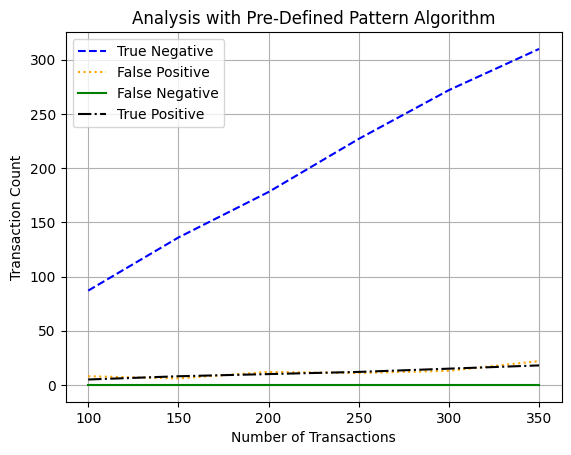

Statistics for Dynamically-Defined
    Accuracies: [0.34, 0.37, 0.35, 0.36, 0.34, 0.35]
    Precisions: [0.06, 0.03, 0.06, 0.04, 0.03, 0.06]
    Recalls: [0.8, 0.38, 0.8, 0.58, 0.33, 0.78]
    F1's: [0.11, 0.06, 0.11, 0.07, 0.06, 0.11]
Actual values in graph:
    True Negatives: [30, 52, 63, 82, 98, 108]
    False Positives: [65, 90, 127, 156, 187, 224]
    False Negatives: [1, 5, 2, 5, 10, 4]
    True Positives: [4, 3, 8, 7, 5, 14]


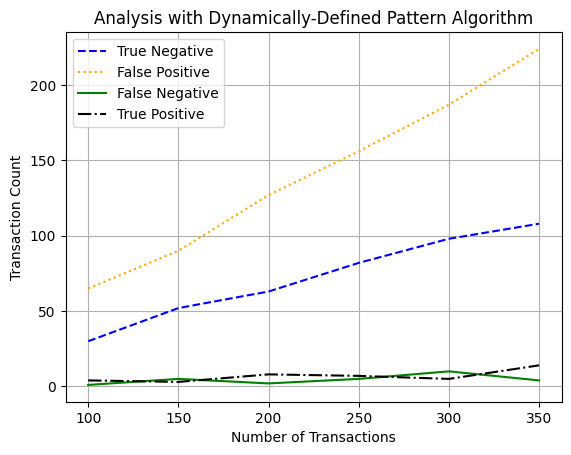

In [4]:
#graph the data

#graph the data for pre-defined patterns
df = pd.DataFrame(dict(
    True_Negative = predefined_good_nonflagged,
    False_Positive = predefined_good_flagged,
    False_Negative = predefined_bad_nonflagged,
    True_Positive = predefined_bad_flagged))

print("Statistics for Predefined")
print(f"    Accuracies: {predefined_accuracies}")
print(f"    Precisions: {predefined_precisions}")
print(f"    Recalls: {predefined_recalls}")
print(f"    F1's: {predefined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {predefined_good_nonflagged}")
print(f"    False Positives: {predefined_good_flagged}")
print(f"    False Negatives: {predefined_bad_nonflagged}")
print(f"    True Positives: {predefined_bad_flagged}")

draw_graph(x_axis_values, df, x_label="Number of Transactions", y_label="Transaction Count", title="Analysis with Pre-Defined Pattern Algorithm")

#graph the data for dynamically-defined patterns

df = pd.DataFrame(dict(
    True_Negative = defined_good_nonflagged,
    False_Positive = defined_good_flagged,
    False_Negative = defined_bad_nonflagged,
    True_Positive = defined_bad_flagged))

print("Statistics for Dynamically-Defined")
print(f"    Accuracies: {defined_accuracies}")
print(f"    Precisions: {defined_precisions}")
print(f"    Recalls: {defined_recalls}")
print(f"    F1's: {defined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {defined_good_nonflagged}")
print(f"    False Positives: {defined_good_flagged}")
print(f"    False Negatives: {defined_bad_nonflagged}")
print(f"    True Positives: {defined_bad_flagged}")

# X-axis values
x_values = x_axis_values

draw_graph(x_axis_values, df, x_label="Number of Transactions", y_label="Transaction Count", title="Analysis with Dynamically-Defined Pattern Algorithm")
 


# Varying number of data items

In [5]:
#collect and organize data
num_transactions=200
min_ops_per_transaction = 5
max_ops_per_transaction = 10
num_training_data = 200000

#varying num data items
starting_index = 100
increment_amount = 50
num_groupings = 6

groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=starting_index+i*increment_amount, num_transactions=num_transactions, min_ops_per_transaction=min_ops_per_transaction, max_ops_per_transaction=max_ops_per_transaction, num_training_data=num_training_data))
    x_axis_values.append(starting_index+i*increment_amount)


defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

print("Pre-Defined:")
print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")
print()
print("Dynamically Defined:")
print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

#statistics for defined
defined_accuracies = []
defined_precisions = []
defined_recalls = []
defined_F1s = []

for i in range(num_groupings):
    good_nonflagged = defined_good_nonflagged[i]
    good_flagged = defined_good_flagged[i]
    bad_nonflagged = defined_bad_nonflagged[i]
    bad_flagged = defined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if not (recall==0.0 and precision==0.0) and ((isinstance(recall, float)) and (isinstance(precision, float))):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    defined_accuracies.append(accuracy)
    defined_precisions.append(precision)
    defined_recalls.append(recall)
    defined_F1s.append(F1)

#statistics for predefined
predefined_accuracies = []
predefined_precisions = []
predefined_recalls = []
predefined_F1s = []

for i in range(num_groupings):
    good_nonflagged = predefined_good_nonflagged[i]
    good_flagged = predefined_good_flagged[i]
    bad_nonflagged = predefined_bad_nonflagged[i]
    bad_flagged = predefined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if not (recall==0.0 and precision==0.0) and ((isinstance(recall, float)) and (isinstance(precision, float))):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    predefined_accuracies.append(accuracy)
    predefined_precisions.append(precision)
    predefined_recalls.append(recall)
    predefined_F1s.append(F1)

Pre-Defined:
True Negatives: [180, 180, 180, 181, 182, 182]
False Positives: [10, 10, 10, 9, 8, 8]
False Negatives: [0, 0, 0, 0, 0, 0]
True Positives: [10, 10, 10, 10, 10, 10]

Dynamically Defined:
True Negatives: [68, 9, 1, 2, 1, 0]
False Positives: [122, 181, 189, 188, 189, 190]
False Negatives: [3, 1, 0, 0, 0, 0]
True Positives: [7, 9, 10, 10, 10, 10]


Statistics for Predefined
    Accuracies: [0.95, 0.95, 0.95, 0.95, 0.96, 0.96]
    Precisions: [0.5, 0.5, 0.5, 0.53, 0.56, 0.56]
    Recalls: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
    F1's: [0.67, 0.67, 0.67, 0.69, 0.72, 0.72]
Actual values in graph:
    True Negatives: [180, 180, 180, 181, 182, 182]
    False Positives: [10, 10, 10, 9, 8, 8]
    False Negatives: [0, 0, 0, 0, 0, 0]
    True Positives: [10, 10, 10, 10, 10, 10]


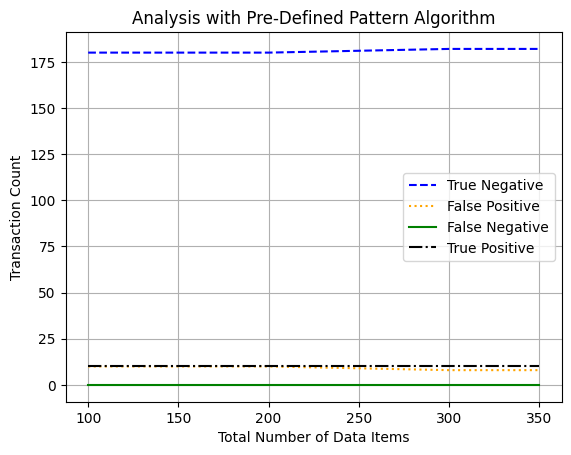

Statistics for Dynamically-Defined
    Accuracies: [0.38, 0.09, 0.06, 0.06, 0.06, 0.05]
    Precisions: [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
    Recalls: [0.7, 0.9, 1.0, 1.0, 1.0, 1.0]
    F1's: [0.09, 0.09, 0.1, 0.1, 0.1, 0.1]
Actual values in graph:
    True Negatives: [68, 9, 1, 2, 1, 0]
    False Positives: [122, 181, 189, 188, 189, 190]
    False Negatives: [3, 1, 0, 0, 0, 0]
    True Positives: [7, 9, 10, 10, 10, 10]


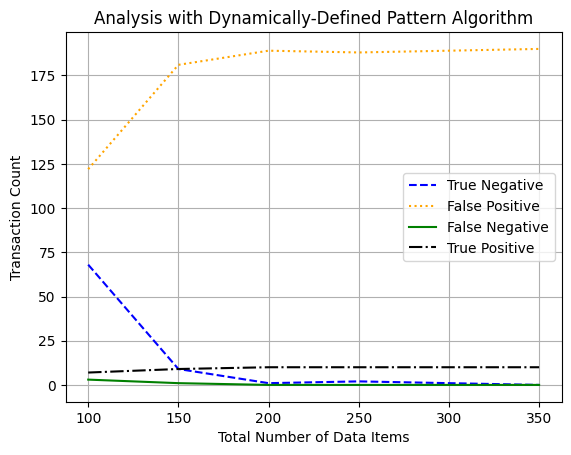

In [6]:
#graph the data

df = pd.DataFrame(dict(
    True_Negative = predefined_good_nonflagged,
    False_Positive = predefined_good_flagged,
    False_Negative = predefined_bad_nonflagged,
    True_Positive = predefined_bad_flagged))

print("Statistics for Predefined")
print(f"    Accuracies: {predefined_accuracies}")
print(f"    Precisions: {predefined_precisions}")
print(f"    Recalls: {predefined_recalls}")
print(f"    F1's: {predefined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {predefined_good_nonflagged}")
print(f"    False Positives: {predefined_good_flagged}")
print(f"    False Negatives: {predefined_bad_nonflagged}")
print(f"    True Positives: {predefined_bad_flagged}")

draw_graph(x_axis_values, df, x_label='Total Number of Data Items', y_label='Transaction Count', title='Analysis with Pre-Defined Pattern Algorithm')

#graph the data for no pre-defined patterns

df = pd.DataFrame(dict(
    True_Negative = defined_good_nonflagged,
    False_Positive = defined_good_flagged,
    False_Negative = defined_bad_nonflagged,
    True_Positive = defined_bad_flagged))

print("Statistics for Dynamically-Defined")
print(f"    Accuracies: {defined_accuracies}")
print(f"    Precisions: {defined_precisions}")
print(f"    Recalls: {defined_recalls}")
print(f"    F1's: {defined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {defined_good_nonflagged}")
print(f"    False Positives: {defined_good_flagged}")
print(f"    False Negatives: {defined_bad_nonflagged}")
print(f"    True Positives: {defined_bad_flagged}")

draw_graph(x_axis_values, df, x_label='Total Number of Data Items', y_label='Transaction Count', title='Analysis with Dynamically-Defined Pattern Algorithm')

# Varying Number of Operations per Transaction

In [7]:
#collect and organize data 
num_transactions=200
num_data_items = 100
num_training_data = 200000

#varying num of ops per transaction
starting_index = 5
increment_amount = 5
num_groupings = 6

groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=num_data_items, num_transactions=num_transactions, min_ops_per_transaction=starting_index+i*increment_amount, max_ops_per_transaction=starting_index+i*increment_amount, num_training_data=num_training_data))
    x_axis_values.append(starting_index+i*increment_amount)
    print(starting_index+i*increment_amount)


defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

print("Pre-Defined:")
print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")
print()
print("Dynamically Defined:")
print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

#statistics for defined
defined_accuracies = []
defined_precisions = []
defined_recalls = []
defined_F1s = []

for i in range(num_groupings):
    good_nonflagged = defined_good_nonflagged[i]
    good_flagged = defined_good_flagged[i]
    bad_nonflagged = defined_bad_nonflagged[i]
    bad_flagged = defined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if not (recall==0.0 and precision==0.0) and ((isinstance(recall, float)) and (isinstance(precision, float))):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    defined_accuracies.append(accuracy)
    defined_precisions.append(precision)
    defined_recalls.append(recall)
    defined_F1s.append(F1)

#statistics for defined
predefined_accuracies = []
predefined_precisions = []
predefined_recalls = []
predefined_F1s = []

for i in range(num_groupings):
    good_nonflagged = predefined_good_nonflagged[i]
    good_flagged = predefined_good_flagged[i]
    bad_nonflagged = predefined_bad_nonflagged[i]
    bad_flagged = predefined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if not (recall==0.0 and precision==0.0) and ((isinstance(recall, float)) and (isinstance(precision, float))):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    predefined_accuracies.append(accuracy)
    predefined_precisions.append(precision)
    predefined_recalls.append(recall)
    predefined_F1s.append(F1)

5
10
15
20
25
30
Pre-Defined:
True Negatives: [181, 180, 183, 181, 182, 182]
False Positives: [9, 10, 7, 9, 8, 8]
False Negatives: [0, 0, 0, 0, 0, 1]
True Positives: [10, 10, 10, 10, 10, 9]

Dynamically Defined:
True Negatives: [9, 163, 190, 190, 190, 190]
False Positives: [181, 27, 0, 0, 0, 0]
False Negatives: [0, 10, 10, 10, 10, 10]
True Positives: [10, 0, 0, 0, 0, 0]


Statistics for Predefined
    Accuracies: [0.95, 0.95, 0.96, 0.95, 0.96, 0.95]
    Precisions: [0.53, 0.5, 0.59, 0.53, 0.56, 0.53]
    Recalls: [1.0, 1.0, 1.0, 1.0, 1.0, 0.9]
    F1's: [0.69, 0.67, 0.74, 0.69, 0.72, 0.67]
Actual values in graph:
    True Negatives: [181, 180, 183, 181, 182, 182]
    False Positives: [9, 10, 7, 9, 8, 8]
    False Negatives: [0, 0, 0, 0, 0, 1]
    True Positives: [10, 10, 10, 10, 10, 9]


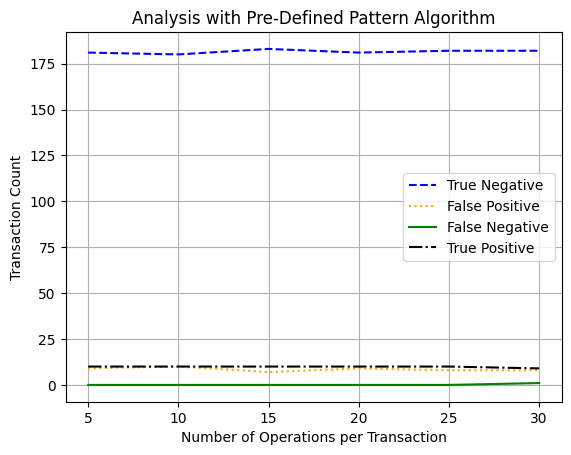

Statistics for Dynamically-Defined
    Accuracies: [0.1, 0.81, 0.95, 0.95, 0.95, 0.95]
    Precisions: [0.05, 0.0, 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0']
    Recalls: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    F1's: [0.1, 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0']
Actual values in graph:
    True Negatives: [9, 163, 190, 190, 190, 190]
    False Positives: [181, 27, 0, 0, 0, 0]
    False Negatives: [0, 10, 10, 10, 10, 10]
    True Positives: [10, 0, 0, 0, 0, 0]


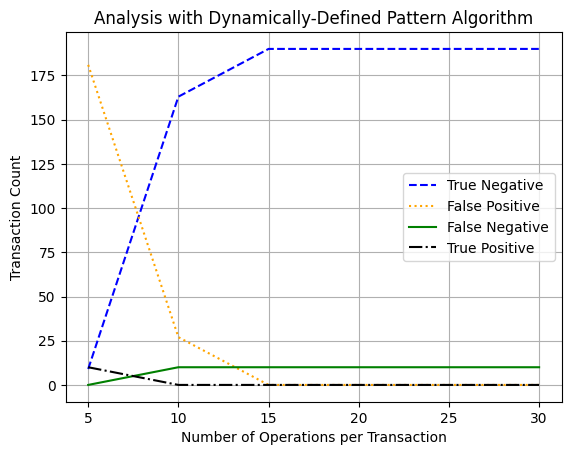

In [8]:
#graph the data

df = pd.DataFrame(dict(
    True_Negative = predefined_good_nonflagged,
    False_Positive = predefined_good_flagged,
    False_Negative = predefined_bad_nonflagged,
    True_Positive = predefined_bad_flagged))

print("Statistics for Predefined")
print(f"    Accuracies: {predefined_accuracies}")
print(f"    Precisions: {predefined_precisions}")
print(f"    Recalls: {predefined_recalls}")
print(f"    F1's: {predefined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {predefined_good_nonflagged}")
print(f"    False Positives: {predefined_good_flagged}")
print(f"    False Negatives: {predefined_bad_nonflagged}")
print(f"    True Positives: {predefined_bad_flagged}")

draw_graph(x_axis_values, df, x_label='Number of Operations per Transaction', y_label='Transaction Count', title='Analysis with Pre-Defined Pattern Algorithm')

#graph the data for no pre-defined patterns

df = pd.DataFrame(dict(
    True_Negative = defined_good_nonflagged,
    False_Positive = defined_good_flagged,
    False_Negative = defined_bad_nonflagged,
    True_Positive = defined_bad_flagged))

print("Statistics for Dynamically-Defined")
print(f"    Accuracies: {defined_accuracies}")
print(f"    Precisions: {defined_precisions}")
print(f"    Recalls: {defined_recalls}")
print(f"    F1's: {defined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {defined_good_nonflagged}")
print(f"    False Positives: {defined_good_flagged}")
print(f"    False Negatives: {defined_bad_nonflagged}")
print(f"    True Positives: {defined_bad_flagged}")

draw_graph(x_axis_values, df, x_label='Number of Operations per Transaction', y_label='Transaction Count', title='Analysis with Dynamically-Defined Pattern Algorithm')

# Vary number of training data items

In [22]:
#collect and organize data
num_transactions=200
min_ops_per_transaction = 5
max_ops_per_transaction = 10
num_data_items = 100
num_training_data = 200000

#varying num data items
starting_index = 100000
increment_amount = 500000
num_groupings = 10

groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=num_data_items, num_transactions=num_transactions, min_ops_per_transaction=min_ops_per_transaction, max_ops_per_transaction=max_ops_per_transaction, num_training_data=starting_index+i*increment_amount))
    x_axis_values.append(starting_index+i*increment_amount)

defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

print("Pre-Defined:")
print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")
print()
print("Dynamically Defined:")
print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

#statistics for defined
defined_accuracies = []
defined_precisions = []
defined_recalls = []
defined_F1s = []

for i in range(num_groupings):
    good_nonflagged = defined_good_nonflagged[i]
    good_flagged = defined_good_flagged[i]
    bad_nonflagged = defined_bad_nonflagged[i]
    bad_flagged = defined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if not (recall==0.0 and precision==0.0) and ((isinstance(recall, float)) and (isinstance(precision, float))):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    defined_accuracies.append(accuracy)
    defined_precisions.append(precision)
    defined_recalls.append(recall)
    defined_F1s.append(F1)

#statistics for predefined
predefined_accuracies = []
predefined_precisions = []
predefined_recalls = []
predefined_F1s = []

for i in range(num_groupings):
    good_nonflagged = predefined_good_nonflagged[i]
    good_flagged = predefined_good_flagged[i]
    bad_nonflagged = predefined_bad_nonflagged[i]
    bad_flagged = predefined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if not (recall==0.0 and precision==0.0) and ((isinstance(recall, float)) and (isinstance(precision, float))):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    predefined_accuracies.append(accuracy)
    predefined_precisions.append(precision)
    predefined_recalls.append(recall)
    predefined_F1s.append(F1)

Pre-Defined:
True Negatives: [177, 172, 177, 175, 179, 182, 177, 182, 179, 177]
False Positives: [13, 18, 13, 15, 11, 8, 13, 8, 11, 13]
False Negatives: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Positives: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

Dynamically Defined:
True Negatives: [65, 84, 67, 68, 69, 64, 64, 71, 70, 65]
False Positives: [125, 106, 123, 122, 121, 126, 126, 119, 120, 125]
False Negatives: [3, 0, 5, 2, 5, 5, 5, 3, 5, 3]
True Positives: [7, 10, 5, 8, 5, 5, 5, 7, 5, 7]


Statistics for Predefined
    Accuracies: [0.94, 0.91, 0.94, 0.93, 0.94, 0.96, 0.94, 0.96, 0.94, 0.94]
    Precisions: [0.43, 0.36, 0.43, 0.4, 0.48, 0.56, 0.43, 0.56, 0.48, 0.43]
    Recalls: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
    F1's: [0.6, 0.53, 0.6, 0.57, 0.65, 0.72, 0.6, 0.72, 0.65, 0.6]
Actual values in graph:
    True Negatives: [177, 172, 177, 175, 179, 182, 177, 182, 179, 177]
    False Positives: [13, 18, 13, 15, 11, 8, 13, 8, 11, 13]
    False Negatives: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    True Positives: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


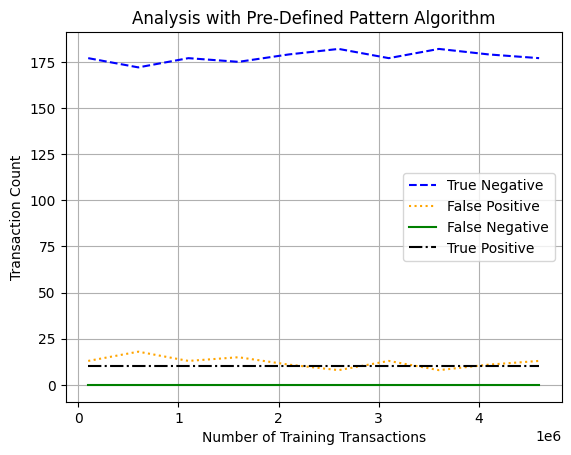

Statistics for Dynamically-Defined
    Accuracies: [0.36, 0.47, 0.36, 0.38, 0.37, 0.34, 0.34, 0.39, 0.38, 0.36]
    Precisions: [0.05, 0.09, 0.04, 0.06, 0.04, 0.04, 0.04, 0.06, 0.04, 0.05]
    Recalls: [0.7, 1.0, 0.5, 0.8, 0.5, 0.5, 0.5, 0.7, 0.5, 0.7]
    F1's: [0.09, 0.17, 0.07, 0.11, 0.07, 0.07, 0.07, 0.11, 0.07, 0.09]
Actual values in graph:
    True Negatives: [65, 84, 67, 68, 69, 64, 64, 71, 70, 65]
    False Positives: [125, 106, 123, 122, 121, 126, 126, 119, 120, 125]
    False Negatives: [3, 0, 5, 2, 5, 5, 5, 3, 5, 3]
    True Positives: [7, 10, 5, 8, 5, 5, 5, 7, 5, 7]


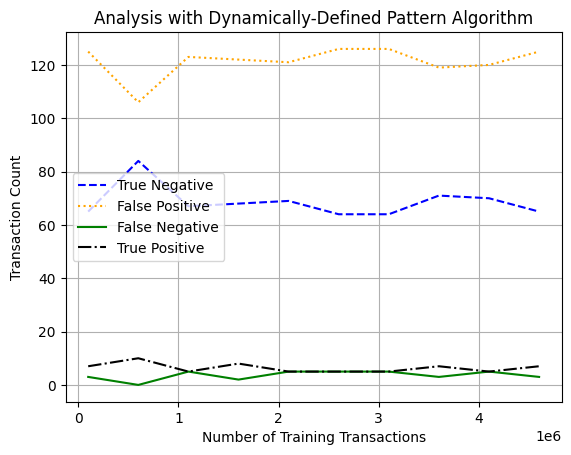

In [24]:
#graph the data

df = pd.DataFrame(dict(
    True_Negative = predefined_good_nonflagged,
    False_Positive = predefined_good_flagged,
    False_Negative = predefined_bad_nonflagged,
    True_Positive = predefined_bad_flagged))

print("Statistics for Predefined")
print(f"    Accuracies: {predefined_accuracies}")
print(f"    Precisions: {predefined_precisions}")
print(f"    Recalls: {predefined_recalls}")
print(f"    F1's: {predefined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {predefined_good_nonflagged}")
print(f"    False Positives: {predefined_good_flagged}")
print(f"    False Negatives: {predefined_bad_nonflagged}")
print(f"    True Positives: {predefined_bad_flagged}")

draw_graph(x_axis_values, df, x_label='Number of Training Transactions', y_label='Transaction Count', title='Analysis with Pre-Defined Pattern Algorithm')

#graph the data for no pre-defined patterns

df = pd.DataFrame(dict(
    True_Negative = defined_good_nonflagged,
    False_Positive = defined_good_flagged,
    False_Negative = defined_bad_nonflagged,
    True_Positive = defined_bad_flagged))

print("Statistics for Dynamically-Defined")
print(f"    Accuracies: {defined_accuracies}")
print(f"    Precisions: {defined_precisions}")
print(f"    Recalls: {defined_recalls}")
print(f"    F1's: {defined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {defined_good_nonflagged}")
print(f"    False Positives: {defined_good_flagged}")
print(f"    False Negatives: {defined_bad_nonflagged}")
print(f"    True Positives: {defined_bad_flagged}")

draw_graph(x_axis_values, df, x_label='Number of Training Transactions', y_label='Transaction Count', title='Analysis with Dynamically-Defined Pattern Algorithm')